# Parkinsons Ensemble Techniques

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

#### 1. Load the data set

In [3]:
parkinsons_df=pd.read_csv("parkinsons.data")

#### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

In [4]:
parkinsons_df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
parkinsons_df.shape

(195, 24)

In [6]:
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
parkinsons_df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### 3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [8]:
parkinsons_u=parkinsons_df['MDVP:Fhi(Hz)']

(array([69., 47., 53., 14.,  0.,  1.,  3.,  3.,  0.,  5.]),
 array([102.145 , 151.1335, 200.122 , 249.1105, 298.099 , 347.0875,
        396.076 , 445.0645, 494.053 , 543.0415, 592.03  ]),
 <a list of 10 Patch objects>)

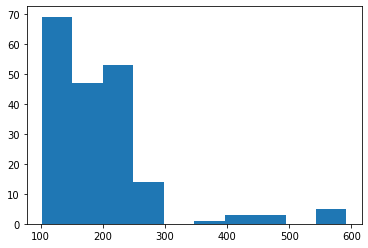

In [9]:
plt.hist(parkinsons_u,bins=10)

In [ ]:
#We observe that most of the data lies within the first three bins( 100-250)

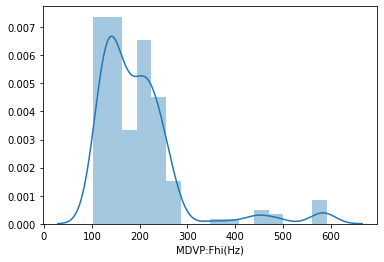

In [10]:
sns.distplot(parkinsons_u)

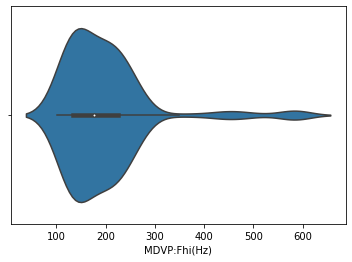

In [11]:
sns.violinplot(parkinsons_u)

In [12]:
#Mean
print("Mean : ",parkinsons_df.mean())

Mean :  MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
status                0.753846
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
dtype: float64


In [73]:
#Mode
print("Mode : ",parkinsons_df.mode())

Mode :       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0         88.333       102.145        65.476         0.00369   
1         91.904       102.305        65.750         0.00694   
2         95.056       107.715        65.782         0.00742   
3         95.385       108.664        65.809             NaN   
4         95.605       110.019        66.004             NaN   
5         95.730       112.240        66.157             NaN   
6         96.106       112.777        67.021             NaN   
7         98.804       113.597        67.343             NaN   
8        100.770       113.840        68.401             NaN   
9        100.960       115.697        68.623             NaN   
10       102.273       115.871        69.085             NaN   
11       104.400       116.443        71.948             NaN   
12       106.516       119.167        74.287             NaN   
13       107.332       120.103        74.677             NaN   
14       108.807       122.611  

In [14]:
#Median
print("Median : ",parkinsons_df.median())

Median :  MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
dtype: float64


### Quantile 25%

In [15]:
print("Data_quantile(25%): ",parkinsons_df.quantile(q=0.25))

Data_quantile(25%):  MDVP:Fo(Hz)         117.572000
MDVP:Fhi(Hz)        134.862500
MDVP:Flo(Hz)         84.291000
MDVP:Jitter(%)        0.003460
MDVP:Jitter(Abs)      0.000020
MDVP:RAP              0.001660
MDVP:PPQ              0.001860
Jitter:DDP            0.004985
MDVP:Shimmer          0.016505
MDVP:Shimmer(dB)      0.148500
Shimmer:APQ3          0.008245
Shimmer:APQ5          0.009580
MDVP:APQ              0.013080
Shimmer:DDA           0.024735
NHR                   0.005925
HNR                  19.198000
status                1.000000
RPDE                  0.421306
DFA                   0.674758
spread1              -6.450096
spread2               0.174351
D2                    2.099125
PPE                   0.137451
Name: 0.25, dtype: float64


### Quantile 50%

In [16]:
print("Data_quantile(50%): ",parkinsons_df.quantile(q=0.50))

Data_quantile(50%):  MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
Name: 0.5, dtype: float64


### Quantile 75%

In [17]:
print("Data_quantile(75%): ",parkinsons_df.quantile(q=0.75))

Data_quantile(75%):  MDVP:Fo(Hz)         182.769000
MDVP:Fhi(Hz)        224.205500
MDVP:Flo(Hz)        140.018500
MDVP:Jitter(%)        0.007365
MDVP:Jitter(Abs)      0.000060
MDVP:RAP              0.003835
MDVP:PPQ              0.003955
Jitter:DDP            0.011505
MDVP:Shimmer          0.037885
MDVP:Shimmer(dB)      0.350000
Shimmer:APQ3          0.020265
Shimmer:APQ5          0.022380
MDVP:APQ              0.029400
Shimmer:DDA           0.060795
NHR                   0.025640
HNR                  25.075500
status                1.000000
RPDE                  0.587562
DFA                   0.761881
spread1              -5.046192
spread2               0.279234
D2                    2.636456
PPE                   0.252980
Name: 0.75, dtype: float64


### IQR Value for MDVP:Fhi(Hz)

In [18]:
parkinsons_df['MDVP:Fhi(Hz)'].quantile(0.75) - parkinsons_df['MDVP:Fhi(Hz)'].quantile(0.25)

89.34299999999999

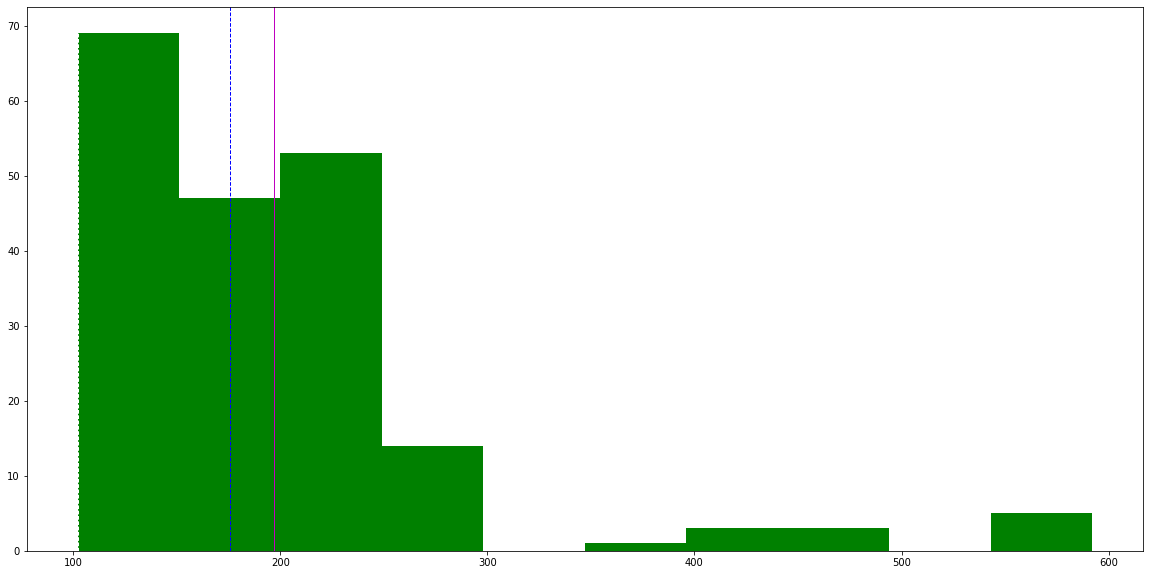

In [19]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(parkinsons_u, color='g') # plots a simple histogram
plt.axvline(parkinsons_u.mean(), color='m', linewidth=1)
plt.axvline(parkinsons_u.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(parkinsons_u.mode()[0], color='w', linestyle='dashed', linewidth=1)

In [ ]:
#Bi-Variate Analysis

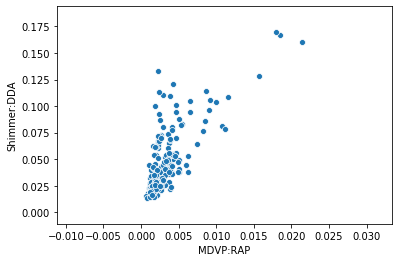

In [75]:
sns.scatterplot(parkinsons_df['MDVP:RAP'], parkinsons_df['Shimmer:DDA'])

In [20]:
#Multivariate Analysis

In [21]:
parkinsons_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


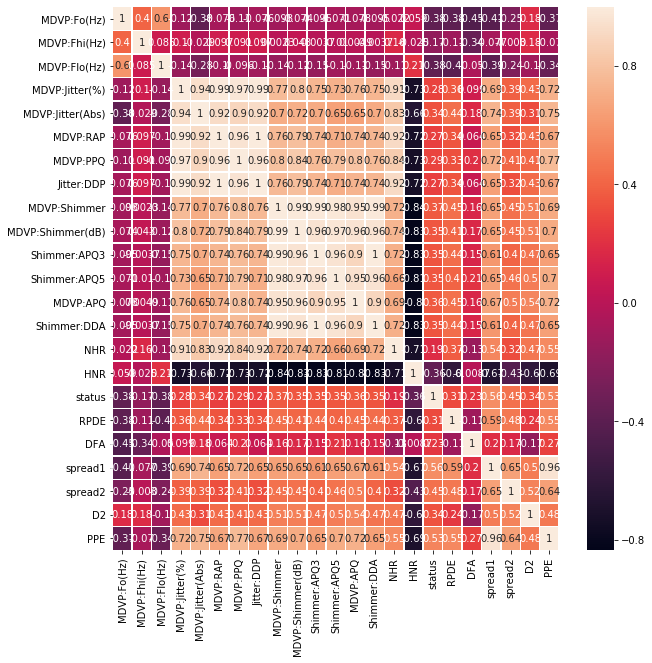

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(parkinsons_df.corr(), annot=True,linewidths=.5, ax=ax)

### Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [23]:
parkinsons_df_original=parkinsons_df

In [24]:
parkinsons_df.drop(labels='name',axis=1,inplace=True)

In [25]:
parkinsons_df.groupby(['status']).count()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [27]:
X_df = parkinsons_df.loc[:,parkinsons_df.columns != 'status']
y_df = parkinsons_df.loc[:,parkinsons_df.columns == 'status']

In [28]:
# Create the training and test data set in the ratio of 70:30 respectively.
from sklearn.model_selection import train_test_split

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.30, random_state=1)


### Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [29]:
#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=100 )

In [30]:
dt_model.fit(X_train, y_train) 
dt_model_score = dt_model.score(X_test, y_test)
y_predict = dt_model.predict(X_test)
print(dt_model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.8813559322033898
[[13  6]
 [ 1 39]]


### Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab.

In [31]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.87      0.97      0.92        40

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59



### Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [32]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, min_samples_leaf=4)

In [33]:
reg_dt_model.fit(X_train, y_train)
y_predict = reg_dt_model.predict(X_test)
score=reg_dt_model.score(X_test , y_test)
print(score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9152542372881356
[[15  4]
 [ 1 39]]


In [34]:
#Regularization had a positive impact on the model accuracy. 
#We observe an increase in the accuracy by 3.0% which is acceptable.

In [ ]:
##Regularization is normally useful to correct overfitting. 
##Using the regularization parameters, we can also 
##increase the performance of the model to get better model accuracy.

### Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10,random_state=100)
rfcl = rfcl.fit(X_train, y_train)

In [71]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.9152542372881356
[[15  4]
 [ 1 39]]


In [ ]:
#When we use n_estimators as 10, we observe the accuracy is 91.5% which is acceptable.